# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx



Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# How many neighbourhood groups / which shows up the most

x = air_bnb.groupby('neighbourhood_group')
x.count()['id'].sort_values()


# Manhattan shows up the most out of 5 neighborhoods



neighbourhood_group
Staten Island      373
Bronx             1091
Queens            5666
Brooklyn         20104
Manhattan        21661
Name: id, dtype: int64

In [12]:
# Are private rooms the most popular in Manhattan?
air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan'].groupby('room_type').count()['id']

# private rooms are the most popular in manhattan

room_type
Entire home/apt    13199
Private room        7982
Shared room          480
Name: id, dtype: int64

In [17]:
# Who are the top 10 busiest hosts based on number of reviews per month?

air_bnb.groupby('host_id').sum()['reviews_per_month'].sort_values(ascending=False)[:10]

# top ten busiest
# host_id
# 219517861    397.56
# 244361589    111.72
# 232251881     80.63
# 26432133      68.02
# 137274917     62.89
# 224414117     59.10
# 156948703     56.44
# 344035        56.00
# 156684502     54.38
# 37312959      53.53

host_id
219517861    397.56
244361589    111.72
232251881     80.63
26432133      68.02
137274917     62.89
224414117     59.10
156948703     56.44
344035        56.00
156684502     54.38
37312959      53.53
Name: reviews_per_month, dtype: float64

In [25]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart

avgPrice = air_bnb.groupby('neighbourhood_group').mean()['price'].sort_values(ascending=False)

# Manhattan has the largest avg Price
avgPrice

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

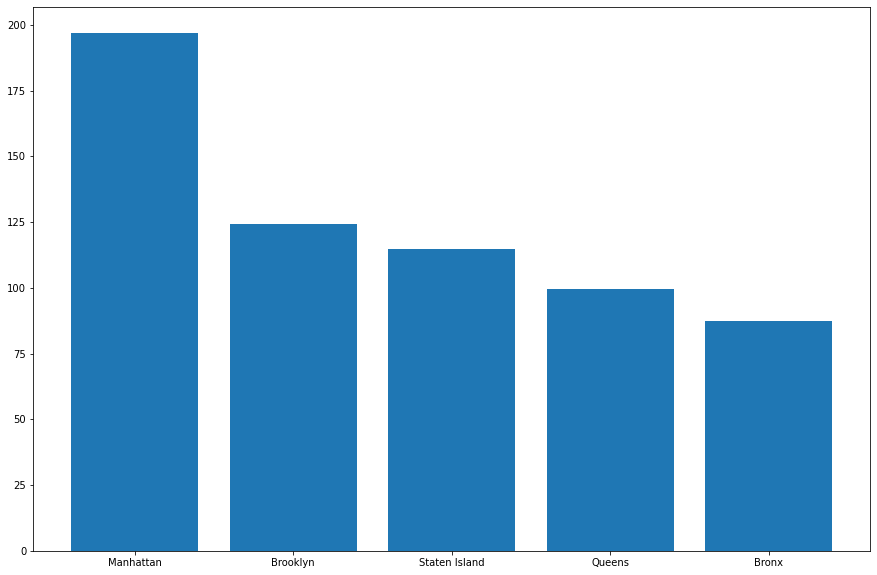

In [28]:
## plot this
fig, ax = plt.subplots(figsize=(15,10))

plt.bar(avgPrice.index.to_list(), avgPrice)

plt.show()

In [40]:
# What is the most expensive neighbourhood in each neighbourhood_group

for neighbourhood_group in avgPrice.index:
    print(neighbourhood_group)
    print(air_bnb[air_bnb['neighbourhood_group'] == neighbourhood_group].groupby('neighbourhood').mean()['price'].nlargest(1))
    print('============================================')


Manhattan
neighbourhood
Tribeca    490.638418
Name: price, dtype: float64
Brooklyn
neighbourhood
Sea Gate    487.857143
Name: price, dtype: float64
Staten Island
neighbourhood
Fort Wadsworth    800.0
Name: price, dtype: float64
Queens
neighbourhood
Neponsit    274.666667
Name: price, dtype: float64
Bronx
neighbourhood
Riverdale    442.090909
Name: price, dtype: float64


In [43]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights


air_bnb['minimum_rental'] = air_bnb['price'] * air_bnb['minimum_nights']
air_bnb

# Jenny has the highest minimum rental

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_rental,minimum_rental
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,140,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,160,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1150,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55,55


In [44]:
air_bnb.nlargest(5, 'minimum_rental')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_rental,minimum_rental
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365,1170000,1170000
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,1000000,1000000
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,989901,989901
17811,13963005,Gorgeous 2 Bedroom apartment,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350,365,0,NaN,NaN,1,364,857750,857750
44429,34221161,Room with sofa bed or air mattress,9295237,Noelle,Queens,Astoria,40.75593,-73.91276,Private room,2000,365,0,NaN,NaN,2,0,730000,730000


In [46]:
# Who has no (zero) availability with a review count of 100 or more

# 162 hosts have no avail and 100 + reviews

air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >=100)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_rental,minimum_rental
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,158,158
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,500,500
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0,150,150
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0,588,588
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0,130,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0,130,130
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0,65,65
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0,49,49
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0,48,48


In [52]:
# If each host rents all of their properties for the night, which 5 make the most that night?


air_bnb.groupby(['host_id', 'host_name']).sum().nlargest(5, 'price')

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,min_rental,minimum_rental
host_id,host_name,,,,,,,,,,,
219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588,950453,950453
107434423,Blueground,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580,2258580
156158778,Sally,332529233,488.73929,-887.71735,37097,12,1,1.00,144,776,37097,37097
205031545,Red Awning,1415225676,1996.92821,-3624.34656,35294,750,127,21.21,2401,10796,525450,525450
30283594,Kara,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,1164243,1164243


In [54]:
# When did Danielle from Queens last receive a review?

# Last review was 2019-07-08

air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')].sort_values('last_review', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_rental,minimum_rental
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337,48,48
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338,48,48
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341,48,48
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80,38,38
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347,54,54
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333,216,216
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180,750,750
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0,50,50


In [56]:
# bar chart showing the number of room types in the Bronx
bronx = air_bnb[air_bnb['neighbourhood_group'] == 'Bronx']
room_counts = bronx.groupby('room_type').count()['id']
room_counts



room_type
Entire home/apt    379
Private room       652
Shared room         60
Name: id, dtype: int64

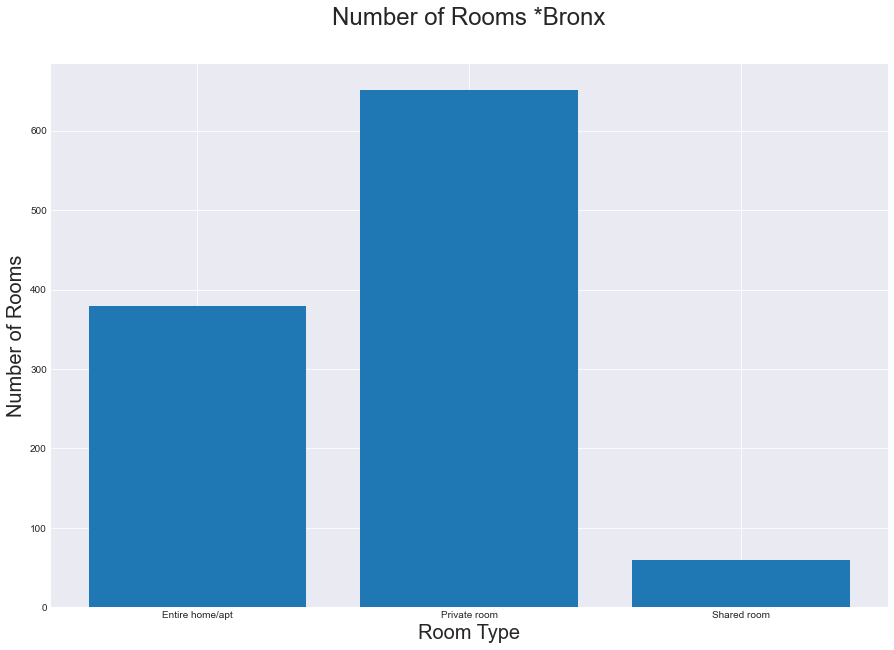

In [62]:
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.bar(room_counts.index, room_counts)
    plt.title('Number of Rooms *Bronx', fontsize=24, y=1.06)
    plt.xlabel('Room Type', fontsize=20)
    plt.ylabel('Number of Rooms', fontsize=20)
    plt.grid(True)
    plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --